In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import *

Version  1.0.6
Version:  0.0.31


In [3]:
data_train=double_moon_data(d=-2,N=1000)
data_test=double_moon_data(d=-2,N=200)

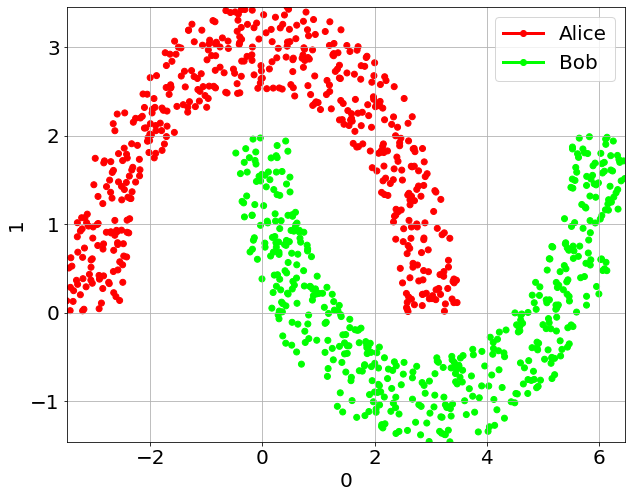

In [4]:
plot2D(data_train)

## no hidden layer, linear units = Perceptron

In [6]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(2,'linear'),  # number of classes
    'cost':'mse',
})

# activation functions - linear, tanh (-1 to 1), logistic (0 to 1), relu (min 0, linear)

In [7]:
C.fit(data_train.vectors,data_train.targets,epochs=3000)

layer       filters  size              input                output
   0 input                  1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2
   1 connected              1000 x   1 x   1 x   2   ->  1000 x   2
   2 cost                   1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2


100%|██████████| 3000/3000 [00:03<00:00, 912.21it/s]


In [8]:
print((C.predict(data_test.vectors)))
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
('On Training Set:', 83.39999999999999)
('On Test Set:', 86.0)


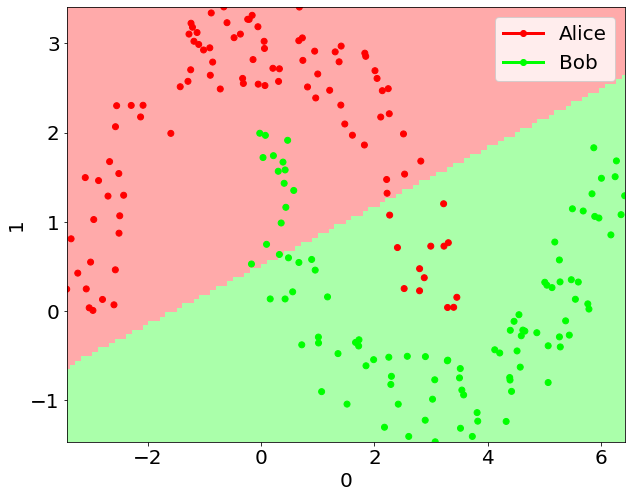

In [9]:
plot2D(data_test,classifier=C)

In [10]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(15,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [11]:
C.fit(data_train.vectors,data_train.targets,epochs=6000)

layer       filters  size              input                output
   0 input                  1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2
   1 connected              1000 x   1 x   1 x   2   ->  1000 x  15
   2 connected              1000 x   1 x   1 x  15   ->  1000 x   2
   3 cost                   1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2


100%|██████████| 6000/6000 [00:12<00:00, 467.52it/s]


In [12]:
print((C.predict(data_test.vectors)))
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('On Training Set:', 100.0)
('On Test Set:', 100.0)


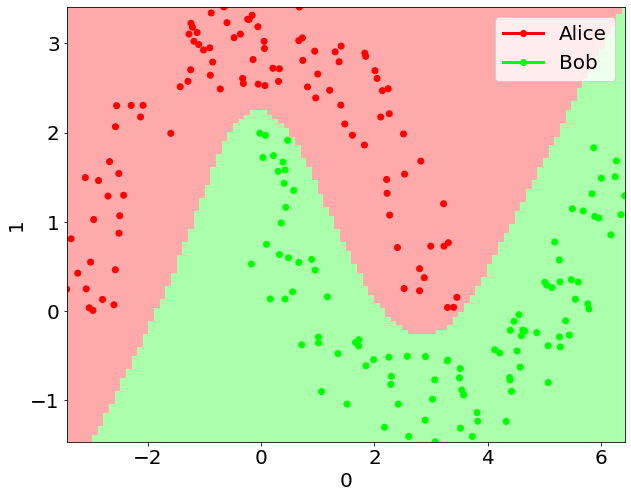

In [13]:
plot2D(data_test,classifier=C)

In [14]:
C.weights

[array([[ 0.33963149,  2.22619927, -1.42685266, -1.15799489, -0.1974377 ,
         -2.31090482,  2.07560296,  1.11271302, -2.03579099, -2.35289643,
          2.08402359, -3.54413425,  1.89154334, -1.0760553 ,  1.00078259],
        [-0.94622239,  1.1328337 ,  1.29841092,  1.20043854, -0.76032812,
         -2.10311956, -1.69348105, -0.9205031 ,  1.44950606, -1.10165693,
         -1.86056633,  0.54300606, -1.62927968,  1.00771776, -0.756905  ]]),
 array([[ 0.51573631,  0.40746766],
        [ 3.43774983, -3.79793461],
        [ 2.18161249, -3.08968431],
        [ 1.52488339, -1.05255542],
        [ 0.89168915, -0.87042505],
        [-3.96193049,  3.47994663],
        [-1.99120008,  1.76768872],
        [-3.78994948,  3.47479417],
        [ 1.44782147, -1.12167974],
        [-2.46370739,  2.71065825],
        [-1.39238128,  1.48937936],
        [ 2.29901802, -2.86192084],
        [-2.03881533,  1.79124189],
        [ 1.25313009, -1.38577013],
        [-3.24203146,  2.7969935 ]])]

In [15]:
set1,set2=C.weights

In [16]:
set1

array([[ 0.33963149,  2.22619927, -1.42685266, -1.15799489, -0.1974377 ,
        -2.31090482,  2.07560296,  1.11271302, -2.03579099, -2.35289643,
         2.08402359, -3.54413425,  1.89154334, -1.0760553 ,  1.00078259],
       [-0.94622239,  1.1328337 ,  1.29841092,  1.20043854, -0.76032812,
        -2.10311956, -1.69348105, -0.9205031 ,  1.44950606, -1.10165693,
        -1.86056633,  0.54300606, -1.62927968,  1.00771776, -0.756905  ]])

In [18]:
set1.shape

(2, 15)

In [17]:
set2

array([[ 0.51573631,  0.40746766],
       [ 3.43774983, -3.79793461],
       [ 2.18161249, -3.08968431],
       [ 1.52488339, -1.05255542],
       [ 0.89168915, -0.87042505],
       [-3.96193049,  3.47994663],
       [-1.99120008,  1.76768872],
       [-3.78994948,  3.47479417],
       [ 1.44782147, -1.12167974],
       [-2.46370739,  2.71065825],
       [-1.39238128,  1.48937936],
       [ 2.29901802, -2.86192084],
       [-2.03881533,  1.79124189],
       [ 1.25313009, -1.38577013],
       [-3.24203146,  2.7969935 ]])

## images

In [19]:
images=image.load_images('images/digits',verbose=False)
images=remap_targets(images,new_target_names=['0','1','2','3','4','5','6','7','8','9'])
summary(images)

Images
1797 images of shape (8, 8)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
[0]: 178 files
[1]: 182 files
[2]: 177 files
[3]: 183 files
[4]: 181 files
[5]: 182 files
[6]: 181 files
[7]: 179 files
[8]: 174 files
[9]: 180 files


In [40]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.10378408e+01 1.19312187e+02 1.

In [41]:
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()
summary(data)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [-0.80978808 -0.76062444  0.05090062  1.15534692  1.15731463  0.14757362
 -0.58492394 -0.78842773 -0.8089     -0.48131462  0.91337708  1.1790871
  0.89565612  0.54643177 -0.50517669 -0.7920555  -0.80934694 -0.38089774
  0.83382138  0.34884851  0.36693516  0.48540965 -0.51500941 -0.80162123
 -0.80961395 -0.40298365  0.6989145   0.65348312  0.83832563  0.44212011
 -0.42710112 -0.80943981 -0.80978808 -0.42376936  0.46200033  0.69583815
  0.90060731  0.6409165  -0.32974899 -0.80978808 -0.80835438 -0.54916856
  0.33195177  0.38932289  0.46267945  0.55635737 -0.23843929 -0.80536509
 -0.80860397 -0.69465694  0.43470784  0.77252065  0.75197292  0.64360976
 -0.19337939 -0.77600622 -0.80970101 -0.76443796  0.10976348  1.19771355
  1.15126059  0.31145628 -0.46819658 -0.749596  ]
M

In [42]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


In [43]:
# C=NumPyNetBackProp({
#     'input':2,               # number of features
#     'hidden':[(15,'logistic'),],
#     'output':(2,'logistic'),  # number of classes
#     'cost':'mse',
# })

In [44]:
C=NumPyNetBackProp({
    'input':64,               # number of features
    'hidden':[(20,'logistic'),(13,'logistic'),],
    'output':(10,'logistic'),  # number of classes
    'cost':'mse',
})

In [45]:
C.fit(data_train.vectors,data_train.targets,epochs=6000)


layer       filters  size              input                output
   0 input                  1347 x   1 x   1 x  64   ->  1347 x   1 x   1 x  64
   1 connected              1347 x   1 x   1 x  64   ->  1347 x  20
   2 connected              1347 x   1 x   1 x  20   ->  1347 x  13
   3 connected              1347 x   1 x   1 x  13   ->  1347 x  10
   4 cost                   1347 x   1 x   1 x  10   ->  1347 x   1 x   1 x  10


100%|██████████| 6000/6000 [01:09<00:00, 86.56it/s]


In [46]:
print("On the training set: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On the test set: ",C.percent_correct(data_test.vectors,data_test.targets))

On the training set:  99.77728285077951
On the test set:  95.55555555555556


In [47]:
len(C.weights)

3

In [48]:
weights_ih1,weights_h1h2,weights_h2o=C.weights

In [49]:
weights_ih1.shape

(64, 20)

In [50]:
weights_h1h2.shape

(20, 13)

In [51]:
weights_h2o.shape

(13, 10)

In [52]:
weights_ih1

array([[-0.2040748 , -0.45058104, -0.08905322, ...,  0.33851293,
        -0.322729  , -0.50661789],
       [-0.24614688, -0.49155021, -0.36235068, ...,  0.71631864,
        -0.29497542, -0.52947506],
       [-0.64912664,  0.42293286,  1.16301045, ...,  0.92042666,
        -2.17468104, -2.11380121],
       ...,
       [ 0.89782663, -0.49247284,  0.97122042, ...,  2.58001679,
         0.12536953,  0.66186274],
       [-0.48846348,  1.28529285,  0.35092022, ...,  1.81464207,
         0.6328906 ,  1.38931156],
       [-0.85003176, -1.28394029, -0.15992611, ...,  0.63303662,
        -0.07751911,  0.56857583]])

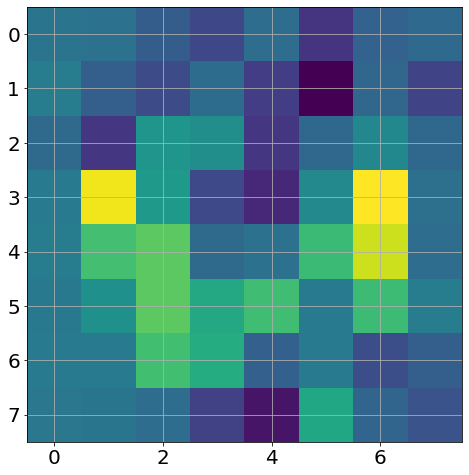

In [53]:
weights_image=weights_ih1[:,0].reshape(8,8)
imshow(weights_image)

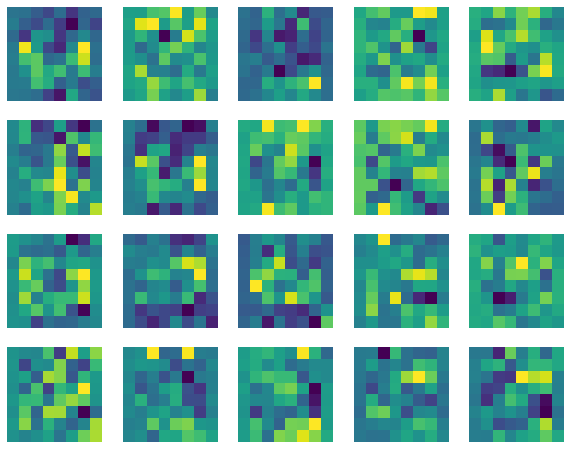

In [54]:
for i in range(20):
    weights_image=weights_ih1[:,i].reshape(8,8)
    subplot(4,5,i+1)
    imshow(weights_image)
    axis('off')

In [57]:
C=NumPyNetBackProp({
    'input':64,               # number of features
    'hidden':[(50,'tanh'),],
    'output':(10,'tanh'),  # number of classes
    'cost':'mse'
})
C.fit(data_train.vectors,data_train.targets,epochs=3000)
print("On the training set: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On the test set: ",C.percent_correct(data_test.vectors,data_test.targets))

layer       filters  size              input                output
   0 input                  1347 x   1 x   1 x  64   ->  1347 x   1 x   1 x  64
   1 connected              1347 x   1 x   1 x  64   ->  1347 x  50
   2 connected              1347 x   1 x   1 x  50   ->  1347 x  10
   3 cost                   1347 x   1 x   1 x  10   ->  1347 x   1 x   1 x  10


100%|██████████| 3000/3000 [00:37<00:00, 80.93it/s]

On the training set:  100.0
On the test set:  98.22222222222223


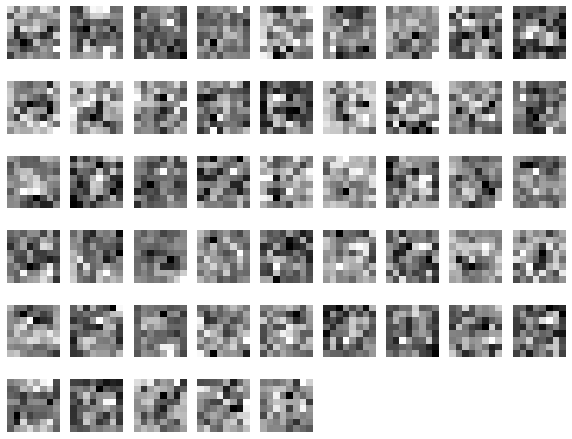

In [59]:
for i in range(50):
    weights_image=C.weights[0][:,i].reshape(8,8)
    subplot(6,9,i+1)
    imshow(weights_image,cmap=cm.gray)
    axis('off')

## color images

In [62]:
images=image.load_images('images/ttt pics/training pieces',verbose=False)
images=remap_targets(images,new_target_names=['_','X','O'])
summary(images)

Images
97 images of shape (50, 50, 3)
Target values given.
Target names: '_', 'X', 'O'
[_]: 37 files
[X]: 29 files
[O]: 31 files


In [63]:
data=image.images_to_vectors(images)
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()
summary(data)
data_train,data_test=split(data)

97 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: '_', 'X', 'O'
Mean:  [255.         236.12371134 177.55670103 ... 234.11340206 174.58762887
 136.7628866 ]
Median:  [255. 237. 181. ... 235. 175. 138.]
Stddev:  [ 0.          4.27473453 16.7301007  ...  3.60662703  3.5486387
  4.40892533]
97 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: '_', 'X', 'O'
Mean:  [ 0.48670134  0.07040178 -1.22124093 ...  0.02606622 -1.28672114
 -2.1209118 ]
Median:  [ 0.48670134  0.08972754 -1.14530207 ...  0.04561934 -1.27762667
 -2.09362837]
Stddev:  [8.88178420e-16 9.42754233e-02 3.68967316e-01 ... 7.95409136e-02
 7.82620332e-02 9.72348807e-02]
Original vector shape:  (97, 7500)
Train vector shape:  (72, 7500)
Test vector shape:  (25, 7500)


In [64]:
C=NumPyNetBackProp({
    'input':7500,               # number of features
    'hidden':[(50,'tanh'),],
    'output':(3,'tanh'),  # number of classes
    'cost':'mse'
})
C.fit(data_train.vectors,data_train.targets,epochs=3000)
print("On the training set: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On the test set: ",C.percent_correct(data_test.vectors,data_test.targets))

layer       filters  size              input                output
   0 input                    72 x   1 x   1 x7500   ->    72 x   1 x   1 x7500
   1 connected                72 x   1 x   1 x7500   ->    72 x  50
   2 connected                72 x   1 x   1 x  50   ->    72 x   3
   3 cost                     72 x   1 x   1 x   3   ->    72 x   1 x   1 x   3


100%|██████████| 3000/3000 [01:41<00:00, 29.46it/s]

On the training set:  100.0
On the test set:  100.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

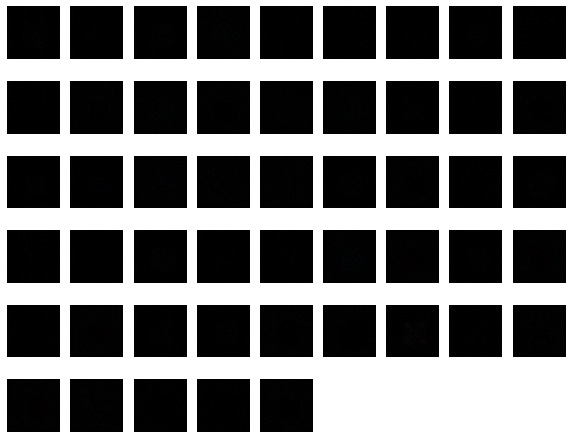

In [65]:
for i in range(50):
    weights_image=C.weights[0][:,i].reshape(50,50,3)
    subplot(6,9,i+1)
    imshow(weights_image,cmap=cm.gray)
    axis('off')

the values need to be between 0 and 1 for an image

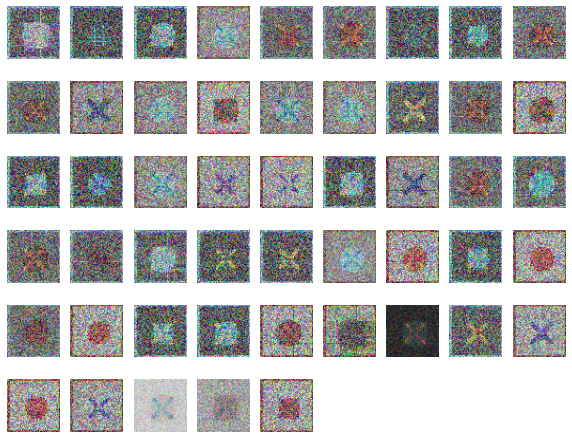

In [66]:
for i in range(50):
    weights_image=C.weights[0][:,i].reshape(50,50,3)
    weights_image-=weights_image.min()  # sets the min to zero
    weights_image/=weights_image.max()  # sets the max to 1
    
    
    subplot(6,9,i+1)
    imshow(weights_image,cmap=cm.gray)
    axis('off')

try a much smaller network

In [68]:
C=NumPyNetBackProp({
    'input':7500,               # number of features
    'hidden':[(6,'tanh'),],
    'output':(3,'tanh'),  # number of classes
    'cost':'mse'
})
C.fit(data_train.vectors,data_train.targets,epochs=3000)
print("On the training set: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On the test set: ",C.percent_correct(data_test.vectors,data_test.targets))

layer       filters  size              input                output
   0 input                    72 x   1 x   1 x7500   ->    72 x   1 x   1 x7500
   1 connected                72 x   1 x   1 x7500   ->    72 x   6
   2 connected                72 x   1 x   1 x   6   ->    72 x   3
   3 cost                     72 x   1 x   1 x   3   ->    72 x   1 x   1 x   3


100%|██████████| 3000/3000 [01:00<00:00, 49.59it/s]

On the training set:  100.0
On the test set:  100.0


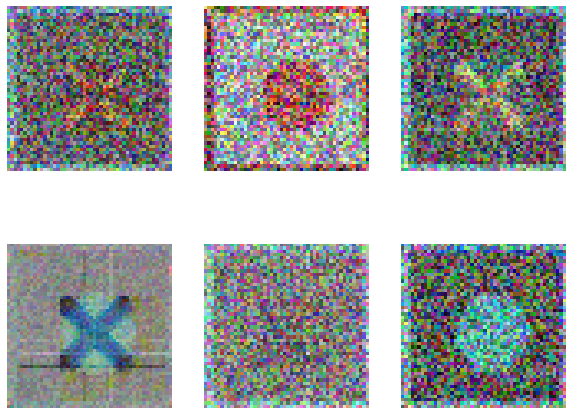

In [69]:
for i in range(6):
    weights_image=C.weights[0][:,i].reshape(50,50,3)
    weights_image-=weights_image.min()  # sets the min to zero
    weights_image/=weights_image.max()  # sets the max to 1
    
    
    subplot(2,3,i+1)
    imshow(weights_image,cmap=cm.gray)
    axis('off')

## try with challenge data set

In [70]:
images=image.load_images('images/ttt pics/training pieces challenge',verbose=False)
images=remap_targets(images,new_target_names=['_','X','O'])
summary(images)

Images
270 images of shape (50, 50, 3)
Target values given.
Target names: '_', 'X', 'O'
[_]: 112 files
[X]: 79 files
[O]: 79 files


In [71]:
data=image.images_to_vectors(images)
data.vectors-=data.vectors.mean()
data.vectors/=data.vectors.std()
summary(data)
data_train,data_test=split(data)

270 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: '_', 'X', 'O'
Mean:  [245.43703704 238.96666667 234.06666667 ... 247.62222222 241.88888889
 238.56666667]
Median:  [254. 254. 253. ... 254. 255. 255.]
Stddev:  [27.09451425 38.34766399 40.48258885 ... 24.76507896 33.18414764
 37.2770558 ]
270 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: '_', 'X', 'O'
Mean:  [ 0.24331925  0.09757802 -0.01279156 ...  0.29253925  0.16339933
  0.08856826]
Median:  [0.43619489 0.43619489 0.41367048 ... 0.43619489 0.45871929 0.45871929]
Stddev:  [0.61028778 0.86375826 0.91184617 ... 0.55781864 0.74745314 0.83964345]
Original vector shape:  (270, 7500)
Train vector shape:  (202, 7500)
Test vector shape:  (68, 7500)


In [76]:
C=NumPyNetBackProp({
    'input':7500,               # number of features
    'hidden':[(25,'tanh'),],
    'output':(3,'tanh'),  # number of classes
    'cost':'mse'
})
C.fit(data_train.vectors,data_train.targets,epochs=3000)
print("On the training set: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On the test set: ",C.percent_correct(data_test.vectors,data_test.targets))

layer       filters  size              input                output
   0 input                   202 x   1 x   1 x7500   ->   202 x   1 x   1 x7500
   1 connected               202 x   1 x   1 x7500   ->   202 x  25
   2 connected               202 x   1 x   1 x  25   ->   202 x   3
   3 cost                    202 x   1 x   1 x   3   ->   202 x   1 x   1 x   3


100%|██████████| 3000/3000 [01:41<00:00, 29.61it/s]

On the training set:  100.0
On the test set:  83.82352941176471


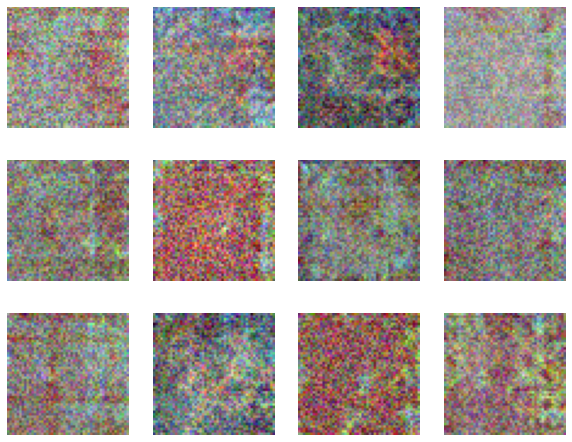

In [78]:
for i in range(12):
    weights_image=C.weights[0][:,i].reshape(50,50,3)
    weights_image-=weights_image.min()  # sets the min to zero
    weights_image/=weights_image.max()  # sets the max to 1
    
    
    subplot(3,4,i+1)
    imshow(weights_image,cmap=cm.gray)
    axis('off')